In [2]:
%pylab inline
import scipy.ndimage
import time
import scipy.sparse.linalg
import scipy.stats
import seaborn as sns
import os

Populating the interactive namespace from numpy and matplotlib


In [191]:
def load_data(dataset):
    d = np.load(dataset)
    mask =  ~(np.isclose(d['permeabilities_x'], 0) & np.isclose(d['permeabilities_y'], 0)) & ((d['permeabilities_y'] + d['permeabilities_x']) / 2 < 30)
    images = d['images'][mask]
    porosities = d['porosities'][mask]
    permeabilities = (d['permeabilities_x'] + d['permeabilities_y']) / 2
    permeabilities_x = d['permeabilities_x'][mask]
    permeabilities_y = d['permeabilities_y'][mask]
    images = np.reshape(images,(*(images.shape), 1))
    d.close()
    return images, porosities, permeabilities_x, permeabilities_y

In [192]:
images = []
porosities = []
permeabilities_x = []
permeabilities_y = []
datasets = os.listdir('datasetsXY')
for dataset in datasets:
    images_n, porosities_n, permeabilities_x_n, permeabilities_y_n = load_data('datasetsXY/' + dataset)
    images.append(images_n)
    porosities.append(porosities_n)
    permeabilities_x.append(permeabilities_x_n)
    permeabilities_y.append(permeabilities_y_n)
    
images = np.concatenate(images)
porosities = np.concatenate(porosities)
permeabilities_x = np.concatenate(permeabilities_x)
permeabilities_y = np.concatenate(permeabilities_y)
permeabilities = (permeabilities_x + permeabilities_y) / 2

In [193]:
images.shape

(895165, 64, 64, 1)

In [194]:
"""
permeabilities_x, indices = np.unique(permeabilities_x, axis=0, return_index=True)
permeabilities_y = permeabilities_y[indices]
porosities = porosities[indices]
permeabilities = (permeabilities_x + permeabilities_y) / 2
"""

'\npermeabilities_x, indices = np.unique(permeabilities_x, axis=0, return_index=True)\npermeabilities_y = permeabilities_y[indices]\nporosities = porosities[indices]\npermeabilities = (permeabilities_x + permeabilities_y) / 2\n'

In [195]:
#images = images[indices]
#images.shape

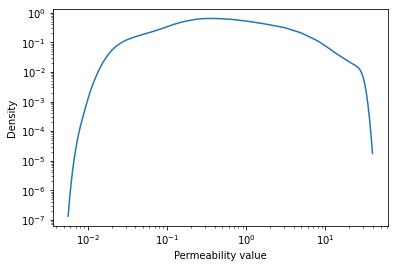

In [196]:
ax = sns.kdeplot(permeabilities, log_scale=(True, True));
ax.set(xlabel='Permeability value');

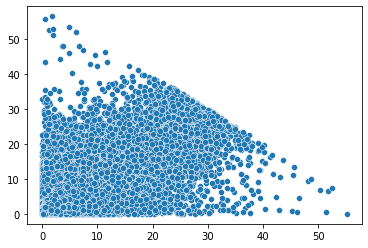

In [197]:
ax = sns.scatterplot(x = permeabilities_x, y = permeabilities_y);

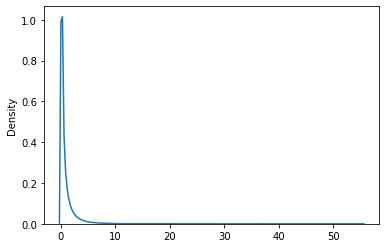

In [198]:
sns.kdeplot(np.abs(permeabilities_x-permeabilities_y));

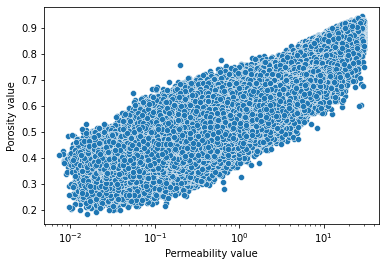

In [199]:
ax = sns.scatterplot(x = permeabilities[~np.isclose(permeabilities, 0)], y = porosities[~np.isclose(permeabilities, 0)]);
ax.set_xscale('log')
ax.set(xlabel='Permeability value', ylabel = 'Porosity value');

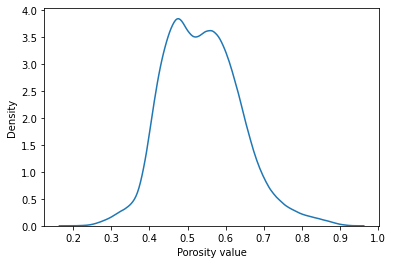

In [200]:
ax = sns.kdeplot(porosities[~np.isclose(permeabilities, 0)], log_scale=(False, False));
ax.set(xlabel='Porosity value');

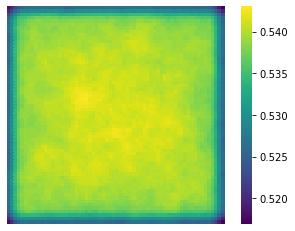

In [201]:
sns.heatmap(np.mean(images.reshape((images.shape[0],64,64)), axis=0), square = True, xticklabels = False, yticklabels = False, cmap = 'viridis');

In [171]:
np.sum(np.isclose(permeabilities_x, 0))

67566

In [172]:
np.sum(permeabilities > 25)

0

In [173]:
permeabilities_x.shape

(794270,)